# Projeto Telecom X: Análise de Evasão de Clientes (Churn)

## 1. Introdução
A Telecom X é uma empresa do setor de telecomunicações que enfrenta um desafio sério: um alto índice de evasão de clientes (churn). A organização percebeu que precisava entender melhor os fatores que levam seus clientes a cancelar os serviços, mas até então não conseguiu encontrar respostas.

E é exatamente aqui que entra este projeto! 👊

Fui contratado como Assistente de Análise de Dados, integrando a equipe de Data Science, para conduzir uma das etapas mais críticas no ciclo de dados: o ETL — Extração, Transformação e Carga, além da Análise Exploratória de Dados (EDA).

## 2. Importação e Carregamento dos Dados (Fase E - Extração)

In [3]:
import pandas as pd

In [10]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X/TelecomX_Data.json'

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [13]:
df.to_csv('df.csv', index=False)

In [22]:
df.head().to_markdown()

"|    | customerID   | Churn   | customer                                                                                     | phone                                           | internet                                                                                                                                                                          | account                                                                                                                                          |\n|---:|:-------------|:--------|:---------------------------------------------------------------------------------------------|:------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------

## 3. Características Gerais da Base de Dados e Tratamento (Fase T - Transformação)

### 3.1. Visão Geral dos Dados

In [16]:
# Retorna uma tupla com o número de linhas e colunas.
df.shape

(7267, 6)

In [17]:
# Lista os nomes de todas as colunas.
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [19]:
#Gera estatísticas descritivas (contagem, média, desvio padrão, min, max, quartis) para colunas numéricas.
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [18]:
#Fornece um resumo conciso do DataFrame, incluindo o tipo de dado de cada coluna, contagem de valores não nulos e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [24]:
pd.json_normalize(df)

""
0
1
2
3
4
5


In [35]:
df_final = df
print(df_final.head().to_markdown())

|    | customerID   | Churn   | customer                                                                                     | phone                                           | internet                                                                                                                                                                          | account                                                                                                                                          |
|---:|:-------------|:--------|:---------------------------------------------------------------------------------------------|:------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# 1. Desaninhando a coluna 'customer'
df_customer = pd.json_normalize(df['customer'])

# 2. Desaninhando a coluna 'phone'
df_phone = pd.json_normalize(df['phone'])

# 3. Desaninhando a coluna 'internet'
df_internet = pd.json_normalize(df['internet'])

# 4. Desaninhando a coluna 'account'
df_account = pd.json_normalize(df['account'])

# Agora, vamos juntar todos esses DataFrames de volta ao DataFrame original.
# Primeiro, remova as colunas originais aninhadas do DataFrame principal.
df_principal = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Em seguida, concatene (junte) os novos DataFrames desaninhados.
# Usamos axis=1 para concatenar colunas.
df_final = pd.concat([df_principal, df_customer, df_phone, df_internet, df_account], axis=1)

# Visualize o resultado para confirmar
print("### DataFrame após Desaninhamento (Primeiras Linhas):")
print(df_final.head().to_markdown())

print("\n---")
print("### Informações do DataFrame após Desaninhamento:")
print(df_final.info())

### DataFrame após Desaninhamento (Primeiras Linhas):
|    | customerID   | Churn   | gender   |   SeniorCitizen | Partner   | Dependents   |   tenure | PhoneService   | MultipleLines   | InternetService   | OnlineSecurity   | OnlineBackup   | DeviceProtection   | TechSupport   | StreamingTV   | StreamingMovies   | Contract       | PaperlessBilling   | PaymentMethod    |   Charges.Monthly |   Charges.Total |
|---:|:-------------|:--------|:---------|----------------:|:----------|:-------------|---------:|:---------------|:----------------|:------------------|:-----------------|:---------------|:-------------------|:--------------|:--------------|:------------------|:---------------|:-------------------|:-----------------|------------------:|----------------:|
|  0 | 0002-ORFBO   | No      | Female   |               0 | Yes       | Yes          |        9 | Yes            | No              | DSL               | No               | Yes            | No                 | Yes           | Yes

In [39]:
# Verifique os valores únicos na coluna 'Charges.Total'
print("Valores únicos em 'Charges.Total':")
print(df_final['Charges.Total'].unique())

# Tente converter para numérico e veja os erros
# O parâmetro 'errors='coerce'' vai transformar qualquer valor que não pode ser convertido em NaN (Not a Number)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Verifique agora se há NaNs recém-criados
print("\nContagem de NaNs em 'Charges.Total' após conversão (se houver):")
print(df_final['Charges.Total'].isnull().sum())

# Se houver NaNs, podemos investigar as linhas originais
# print(df_final[df_final['Charges.Total'].isnull()])

Valores únicos em 'Charges.Total':
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']

Contagem de NaNs em 'Charges.Total' após conversão (se houver):
11


### 3.2. Tratamento de Valores Ausentes

In [40]:
# Passo 1: Localizar as linhas com NaN na coluna 'Charges.Total'
# Criamos uma máscara booleana para encontrar onde 'Charges.Total' é nulo
linhas_com_nan_charges_total = df_final[df_final['Charges.Total'].isnull()]

print("---")
print("### Linhas Identificadas com NaN em 'Charges.Total':")
# Mostra as linhas que contêm NaN. Você pode limitar a quantidade se forem muitas.
if not linhas_com_nan_charges_total.empty:
    print(linhas_com_nan_charges_total.to_markdown())
else:
    print("Nenhuma linha com NaN encontrada (isso é ótimo se você já removeu antes).")


---
### Linhas Identificadas com NaN em 'Charges.Total':
|      | customerID   | Churn   | gender   |   SeniorCitizen | Partner   | Dependents   |   tenure | PhoneService   | MultipleLines    | InternetService   | OnlineSecurity      | OnlineBackup        | DeviceProtection    | TechSupport         | StreamingTV         | StreamingMovies     | Contract   | PaperlessBilling   | PaymentMethod             |   Charges.Monthly |   Charges.Total |
|-----:|:-------------|:--------|:---------|----------------:|:----------|:-------------|---------:|:---------------|:-----------------|:------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------------|:-----------|:-------------------|:--------------------------|------------------:|----------------:|
|  975 | 1371-DWPAZ   | No      | Female   |               0 | Yes       | Yes          |        0 | No             | No phone service | DSL               | Yes     

In [41]:
# Passo 2: Remover as linhas identificadas
# Vamos criar um novo DataFrame sem essas linhas, ou usar inplace=True
# É mais comum usar inplace=True quando se tem certeza da remoção
df_final.dropna(subset=['Charges.Total'], inplace=True)

print("\n---")
print("### Verificação Pós-Remoção:")

# Verifique novamente a contagem de NaNs (deve ser 0)
print("Contagem de NaNs em 'Charges.Total' após remoção (deve ser 0):")
print(df_final['Charges.Total'].isnull().sum())

# Verifique o novo número de linhas no DataFrame
print("Novo número de linhas no DataFrame:")
print(df_final.shape)

# Confirme o tipo de dado da coluna 'Charges.Total'
print("Dtype da coluna 'Charges.Total' após remoção e conversão:")
print(df_final['Charges.Total'].dtype)


---
### Verificação Pós-Remoção:
Contagem de NaNs em 'Charges.Total' após remoção (deve ser 0):
0
Novo número de linhas no DataFrame:
(7256, 21)
Dtype da coluna 'Charges.Total' após remoção e conversão:
float64


### 3.3. Conversão de Tipos de Dados

In [42]:
# Lista de colunas a serem convertidas para o tipo 'category'
# Comece com todas as colunas 'object' e depois ajuste se alguma não for categórica.
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in colunas_categoricas:
    if col in df_final.columns: # Garante que a coluna existe no DataFrame
        df_final[col] = df_final[col].astype('category')

# Verifique os tipos de dados novamente para confirmar a conversão
print("\n---")
print("### Informações do DataFrame após Conversão de Tipos Categóricos:")
print(df_final.info())

# Opcional: Para verificar os valores únicos de algumas colunas categóricas
# print("\nValores únicos na coluna 'Churn':")
# print(df_final['Churn'].unique())
# print("\nValores únicos na coluna 'gender':")
# print(df_final['gender'].unique())


---
### Informações do DataFrame após Conversão de Tipos Categóricos:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   category
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null   category
 5   Dependents        7256 non-null   category
 6   tenure            7256 non-null   int64   
 7   PhoneService      7256 non-null   category
 8   MultipleLines     7256 non-null   category
 9   InternetService   7256 non-null   category
 10  OnlineSecurity    7256 non-null   category
 11  OnlineBackup      7256 non-null   category
 12  DeviceProtection  7256 non-null   category
 13  TechSupport       7256 non-null   category
 14  StreamingTV       7256 non-null   category
 15  Stream

### 3.4. Tratamento de Dados Duplicados

In [43]:
# Verifique o número de linhas completamente duplicadas
num_duplicatas = df_final.duplicated().sum()

print("\n---")
print(f"Número de linhas completamente duplicadas: {num_duplicatas}")


---
Número de linhas completamente duplicadas: 0


### 3.5. Criação de Novas Features (Engenharia de Features)

In [45]:
print("### Colunas antes de Renomear:")
print(df_final.columns)

### Colunas antes de Renomear:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [46]:
# Renomeando as colunas para melhor legibilidade
df_final.rename(columns={'Charges.Monthly': 'MonthlyCharges',
                         'Charges.Total': 'TotalCharges'}, inplace=True)

# Verifique as novas colunas para confirmar a alteração
print("\n---")
print("### Colunas após Renomear:")
print(df_final.columns)

# Opcional: verifique novamente o info para confirmar que os tipos foram mantidos
# print("\n### Informações do DataFrame após Renomear Colunas:")
# print(df_final.info())


---
### Colunas após Renomear:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [47]:
# Definindo as faixas de tempo de contrato
# Vamos usar o pd.cut para categorizar o 'tenure'
bins = [0, 12, 24, 48, 60, df_final['tenure'].max()] # Exemplo: 0-12 meses, 13-24, 25-48, 49-60, > 60
labels = ['0-12 Meses', '13-24 Meses', '25-48 Meses', '49-60 Meses', 'Mais de 60 Meses']

df_final['TenureGroup'] = pd.cut(df_final['tenure'], bins=bins, labels=labels, right=True)

# Verifique as contagens de cada novo grupo
print("\n---")
print("### Distribuição da nova coluna 'TenureGroup':")
print(df_final['TenureGroup'].value_counts().sort_index())

# Verifique as primeiras linhas com a nova coluna
print("\n---")
print("### DataFrame com a nova coluna 'TenureGroup':")
print(df_final[['tenure', 'TenureGroup']].head().to_markdown())

# Verifique o df.info() para ver a nova coluna e seu tipo (category)
print("\n---")
print("### Informações do DataFrame com a nova coluna 'TenureGroup':")
print(df_final.info())


---
### Distribuição da nova coluna 'TenureGroup':
TenureGroup
0-12 Meses          2254
13-24 Meses         1045
25-48 Meses         1648
49-60 Meses          858
Mais de 60 Meses    1451
Name: count, dtype: int64

---
### DataFrame com a nova coluna 'TenureGroup':
|    |   tenure | TenureGroup   |
|---:|---------:|:--------------|
|  0 |        9 | 0-12 Meses    |
|  1 |        9 | 0-12 Meses    |
|  2 |        4 | 0-12 Meses    |
|  3 |       13 | 13-24 Meses   |
|  4 |        3 | 0-12 Meses    |

---
### Informações do DataFrame com a nova coluna 'TenureGroup':
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   category
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null  

### 3.6. Remoção de Colunas Irrelevantes


## 4. Análise Exploratória de Dados (EDA)

### 4.1. Análise de Variáveis Categóricas

In [51]:
df_final.collumns

AttributeError: 'DataFrame' object has no attribute 'collumns'

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
# Para ter gráficos mais bonitos e embutidos no notebook
plt.style.use('ggplot')
# %matplotlib inline

### Distribuição da Variável Churn:
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

### Percentual de Churn:
Churn
No     71.154906
Yes    25.757993
        3.087100
Name: proportion, dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5732\3988227975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Churn', palette='viridis')


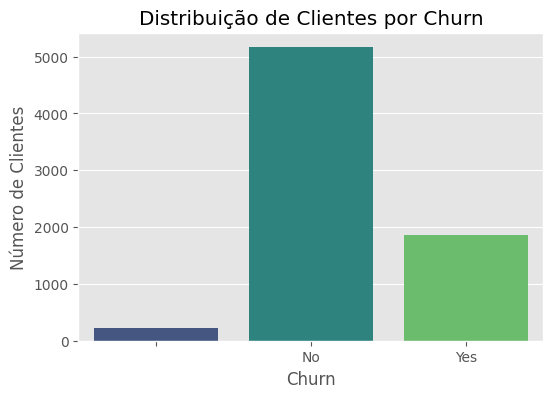

In [49]:
print("### Distribuição da Variável Churn:")
print(df_final['Churn'].value_counts())
print("\n### Percentual de Churn:")
print(df_final['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='Churn', palette='viridis')
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

### 4.2. Análise de Variáveis Numéricas

### 4.3. Análise Multivariada (Relação entre variáveis e Churn)

## 5. Conclusão e Sugestões